In [1]:
import os, zipfile
import glob
import time
import gzip, shutil
import pandas as pd
import itertools

In [2]:
input_path="/data/private/pdutta/SARS_CoV_2/NC_045512v2.fa"
output_path = "/data/private/pdutta/SARS_CoV_2/"

In [3]:
with open(input_path) as f:
    contents = f.readlines()

In [4]:
entire_fasta = ""
for j in contents[1:]:
    entire_fasta = entire_fasta + j.rstrip('\n')

In [5]:
len(entire_fasta)

29903

In [6]:
def seq2kmer(seq, k):
    """
    Convert original sequence to kmers
    
    Arguments:
    seq -- str, original sequence.
    k -- int, kmer of length k specified.
    
    Returns:
    kmers -- str, kmers separated by space
    """
    kmer = [seq[x:x+k] for x in range(len(seq)+1-k)]
    kmers = " ".join(kmer)
    return kmers

In [7]:
start_sequence_coordinates =[]
end_sequence_coordinates =[]
chunk_size =1000
for k in range(0, len(entire_fasta), chunk_size):
    start_sequence_coordinates.append(k+1)
    end_sequence_coordinates.append(k+1000)
del end_sequence_coordinates[-1]
end_sequence_coordinates.append(len(entire_fasta))

In [8]:
df = pd.DataFrame(columns = ["start_position","end_position","sequence","k_mer"])
fasta_sequnce_chunks= [entire_fasta[i:i+chunk_size] for i in range(0, len(entire_fasta), chunk_size)]
k= 6
index = 0
for (start_pos, end_pos, sequence) in zip(start_sequence_coordinates, end_sequence_coordinates, fasta_sequnce_chunks):
    #print(start_pos, end_pos, sequence)
    df.loc[index, ['start_position']] = start_pos
    df.loc[index, ['end_position']] = end_pos
    df.loc[index, ['sequence']] = sequence
    df.loc[index, ['k_mer']] = seq2kmer(sequence, k)
    index= index + 1

In [9]:
df

,start_position,end_position,sequence,k_mer
0,1,1000,ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGA...,ATTAAA TTAAAG TAAAGG AAAGGT AAGGTT AGGTTT GGTT...
1,1001,2000,GAAAAGAGCTATGAATTGCAGACACCTTTTGAAATTAAATTGGCAA...,GAAAAG AAAAGA AAAGAG AAGAGC AGAGCT GAGCTA AGCT...
2,2001,3000,GACTCATTGATGCTATGATGTTCACATCTGATTTGGCTACTAACAA...,GACTCA ACTCAT CTCATT TCATTG CATTGA ATTGAT TTGA...
3,3001,4000,TGAGTTTAAATTGGCTTCACATATGTATTGTTCTTTCTACCCTCCA...,TGAGTT GAGTTT AGTTTA GTTTAA TTTAAA TTAAAT TAAA...
4,4001,5000,ACTAAGTTCCTCACAGAAAACTTGTTACTTTATATTGACATTAATG...,ACTAAG CTAAGT TAAGTT AAGTTC AGTTCC GTTCCT TTCC...
5,5001,6000,TCCACACGCAAGTTGTGGACATGTCAATGACATATGGACAACAGTT...,TCCACA CCACAC CACACG ACACGC CACGCA ACGCAA CGCA...
6,6001,7000,TGATCTTGTACCAAACCAACCATATCCAAACGCAAGCTTCGATAAT...,TGATCT GATCTT ATCTTG TCTTGT CTTGTA TTGTAC TGTA...
7,7001,8000,TCAACCGCTGCTTTAGGTGTTTTAATGTCTAATTTAGGCATGCCTT...,TCAACC CAACCG AACCGC ACCGCT CCGCTG CGCTGC GCTG...
8,8001,9000,ATGTTGGTGATAGTGCGGAAGTTGCAGTTAAAATGTTTGATGCTTA...,ATGTTG TGTTGG GTTGGT TTGGTG TGGTGA GGTGAT GTGA...
9,9001,10000,TTGTGTTTTGGCTGCTGAATGTACAATTTTTAAAGATGCTTCTGGT...,TTGTGT TGTGTT GTGTTT TGTTTT GTTTTG TTTTGG TTTG...


In [10]:
df.to_csv(output_path+"SARS_CoV_2_kmer_sequence_1000.csv", index=False)

In [1]:
import numpy as np

In [2]:
np_arr = np.load("/data/private/pdutta/SARS_CoV_2/atten_values/atten_20230109_covidall.npy")

In [16]:
np_arr.shape

(30, 1024)

In [40]:
list(np_arr[29][800:])

[0.0005774,
 0.000684,
 0.000816,
 0.001271,
 0.001307,
 0.001696,
 0.001353,
 0.000739,
 0.0004423,
 0.0003684,
 0.000368,
 0.000505,
 0.0005155,
 0.000424,
 0.000316,
 0.0002575,
 0.0002432,
 0.0002599,
 0.000344,
 0.000288,
 0.0001947,
 0.0002606,
 9.155e-05,
 3.934e-05,
 0.0001355,
 0.0002004,
 0.0001986,
 0.0002582,
 0.0001862,
 0.0001445,
 0.0002009,
 0.00010145,
 5.72e-05,
 0.0001638,
 0.0002613,
 0.0004632,
 0.000532,
 0.000987,
 0.0001976,
 0.000635,
 0.0002491,
 0.0007195,
 0.00134,
 0.001803,
 0.001643,
 0.001577,
 0.000401,
 0.0002438,
 0.0004764,
 0.001085,
 0.001148,
 0.002682,
 0.000996,
 0.000693,
 0.02544,
 0.001728,
 0.001433,
 0.01724,
 0.02855,
 0.003553,
 0.001718,
 0.00341,
 0.006763,
 0.01384,
 0.01778,
 0.0109,
 0.006783,
 0.02823,
 0.00981,
 0.00165,
 0.0453,
 0.01329,
 0.0519,
 0.04984,
 0.02115,
 0.04,
 0.0707,
 0.029,
 0.03613,
 0.04062,
 0.0421,
 0.0585,
 0.10815,
 0.0868,
 0.0765,
 0.0855,
 0.0718,
 0.0768,
 0.1098,
 0.1196,
 0.1087,
 0.3235,
 0.199,
 0.11

<AxesSubplot: >

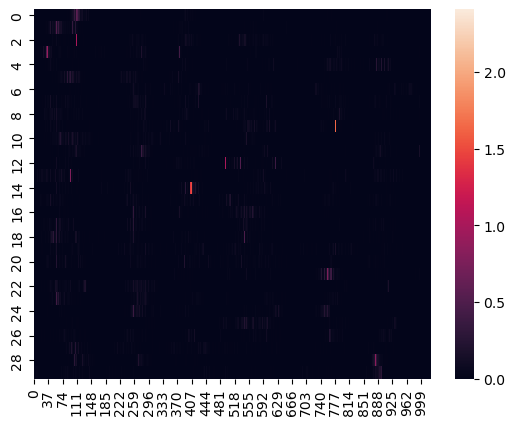

In [13]:
import seaborn as sns
sns.heatmap(np_arr)

In [26]:
np_temp  = np.delete(np_arr, np.s_[-24:], axis=1)
np_temp.shape

(30, 1000)

In [32]:
np_flatten = np_temp.flatten()
all_attention_val = np_flatten[:29903]
len(all_attention_val)

29903

In [33]:
all_attention_val

array([0.3035 , 0.00867, 0.0318 , ..., 0.     , 0.     , 0.     ],
      dtype=float16)

In [53]:
import plotly.graph_objects as go
import plotly.express as px

In [91]:
temp_arr = all_attention_val

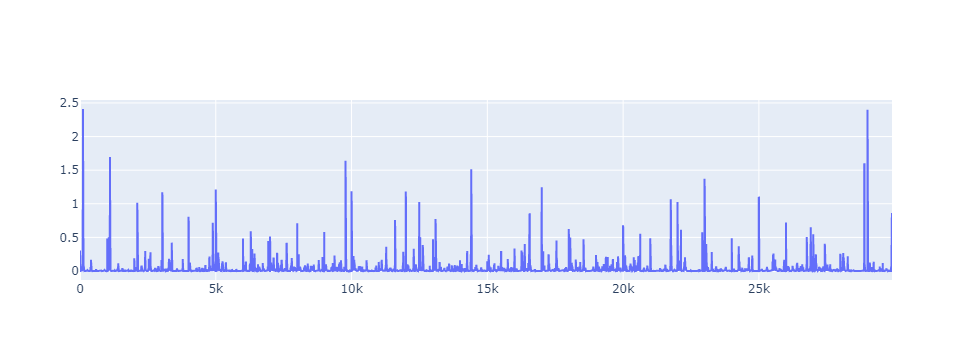

In [92]:
fig = go.Figure()
y_list = temp_arr
x_list = np.arange(len(temp_arr))
fig.add_trace(go.Scatter(x=x_list, y=temp_arr,
                    mode='lines'))

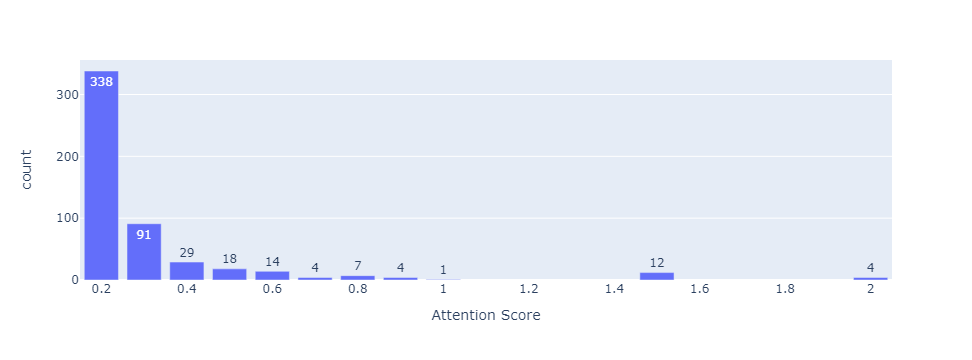

In [90]:
counts, bins = np.histogram(all_attention_val, bins=[0., 0.1 , 0.2, 0.3, 0.4,0.5, 0.6, 0.7,0.8, 0.9, 1., 1.5, 2])
fig = px.bar(x=bins[2:], y=counts[1:], labels={'x':'Attention Score', 'y':'count'}, text_auto=True)
fig.show()

In [100]:
np.where(all_attention_val >0.3)[0]

array([    0,   105,   109,   110,   112,   113,   116,  1000,  1058,
        1063,  1100,  1101,  2110,  3031,  3032,  3033,  3034,  3035,
        3376,  3996,  4000,  4886,  4890,  4891,  5000,  6000,  6289,
        6343,  6932,  7000,  7609,  8000,  8996,  9000,  9778, 10000,
       11278, 11602, 11996, 12000, 12289, 12493, 12494, 12533, 12623,
       12624, 13000, 13094, 14404, 14405, 14407, 16000, 16257, 16375,
       16557, 16558, 17000, 17548, 17550, 18000, 18057, 18543, 20000,
       20633, 21000, 21757, 21758, 21759, 21760, 21761, 21765, 21766,
       21767, 21768, 22000, 22132, 22914, 23000, 23058, 24000, 24257,
       24258, 25000, 26000, 26764, 26906, 27000, 27429, 28882, 28883,
       28884, 28885, 29000, 29891, 29899])

In [86]:
bins[1:]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.5, 2. ])

range(0, 20, 5)